# **Interview Prep**
#### The following python code will be practice for my interview with Shipium. I am giving
#### myself 30 minutes to complete a basic deep neural network using TensorFlow and using
#### some assistance from the library documentation

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
df = pd.read_csv(r"/content/shipping.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [61]:
df.shape

(10999, 12)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [63]:
le = LabelEncoder()

df_le = df.apply(LabelEncoder().fit_transform)

df_le

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,3,0,2,1,81,1,1,0,43,228,1
1,1,4,0,2,4,120,0,1,1,58,1595,1
2,2,0,0,0,1,87,2,1,1,47,1754,1
3,3,1,0,1,2,80,2,2,1,9,173,1
4,4,2,0,0,1,88,1,2,0,45,1249,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10994,0,2,2,0,156,3,2,0,0,519,1
10995,10995,1,2,2,0,136,3,2,0,5,241,0
10996,10996,2,2,3,3,146,3,1,0,3,151,0
10997,10997,4,2,3,1,127,4,2,1,1,206,0


<ipython-input-67-cba1454760c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

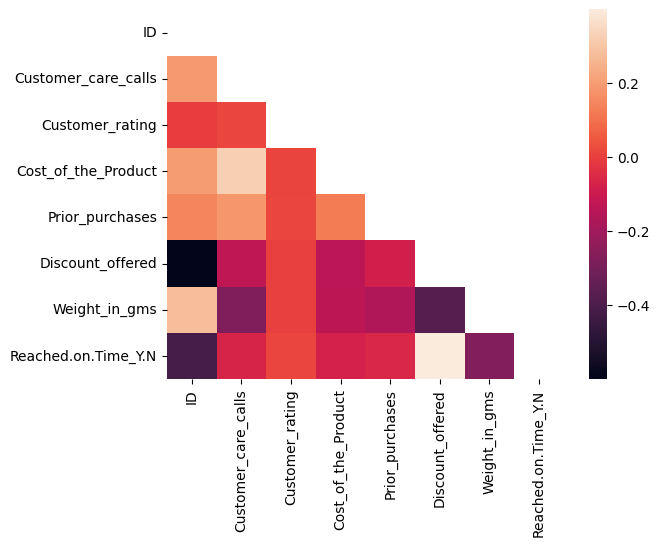

In [67]:
corr = df.corr()

mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, mask=mask)

In [83]:
# Model Creation
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='relu'))

# Model compole

lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

model1.compile(
    loss = 'mse',
    optimizer = optimizer,
    metrics = ['mse','mae']
)

model1 =